# Polar chart - Fake Covid-19 dataset

We've used the following packages:

In [ ]:
import pandas as pd
import numpy as np
import json
import demoji
import sys
import string
import re
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import emoji
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import nltk
from PIL import Image
import itertools
import altair as alt
from dateutil.parser import parse
import seaborn as sns
import num2words
import itertools
import datetime
import pytz
import plotly.express as px
from collections import Counter
from nltk.corpus import stopwords
import contractions

utc=pytz.UTC

To read the JSON file that has all the tweets and the to read the csv used for the classification, it is necessary to do:

In [ ]:
csv_dataframe = pd.read_csv('dataset/FINAL_fakecovid_final_filtered_dataset_clean.csv',sep=";")
csv_dataframe['tweet_id'] = csv_dataframe['tweet_id'].astype(str)
csv_list = csv_dataframe.values.tolist()
lista_unica_csv=list(itertools.chain.from_iterable(csv_list))

data = []
with open('dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))
data1 = data
data2 = data
data3 = data

We're going to plot two polar area charts, one for each category (false, partially false). The polar chart has 8 sections, one per month. **The goal of this visualisation is to show how the usage of words in the charts changed during the first eight months of the Covid-19 pandemic.**

## Hashtag

In order to get a cool and meaningful visualisation we picked the most frequent/more meaningful hashtags, but the chart can be exapanded with as many hashtags as we want.

In [ ]:
index=0
mixhash = []
covid_hashtags = ["covid19","coronavirus","fake","fakenews"]
for element in data:
    token_id = data[index]['id_str']
    indice_csv = lista_unica_csv.index(token_id)
    for entity in data[index]['entities']['hashtags']:
        token_covid=entity['text'].lower()
        if token_covid in covid_hashtags:
            token=data[index]['created_at']
            d = parse(token)
            d = d.strftime('%Y/%m')
            final_token = token_covid + " " +lista_unica_csv[indice_csv+1].lower().replace(" ", "") + " " + d
            mixhash.append(final_token)
        
    index=index+1
    
    
fdist = dict(nltk.FreqDist(mixhash))

df = pd.DataFrame.from_dict(fdist, orient='index').reset_index()
df = df.rename(columns={'index':'Hashtag', 0:'Count'})


col_one_list = df['Hashtag'].tolist()
col_two_list = df['Count'].tolist()
typelist=[]
namelist=[]
datelist=[]

index = 0

count_false = [0] * len(col_one_list)
count_part = [0] * len(col_one_list)

for el in col_one_list:
    tok = el.split()
    namelist.append(tok[0])
    datelist.append(tok[2])
    indx = namelist.index(tok[0])
    if tok[1] == "false":
        count_false[index] = col_two_list[index]
    elif tok[1] == "partiallyfalse":
        count_part[index] = col_two_list[index]
    else:
        print("errore count")
    index = index + 1



df['Hashtag']=namelist
df['Count False Tweets']=count_false
df['Count Partially False Tweets']=count_part
del df['Count']
df['Count'] = df['Count False Tweets'] + df['Count Partially False Tweets']
df['Date']=datelist


df = df.sort_values(by=['Date'],ascending=[False])
#print(df.loc[df['Date'] == "2020/03"])

fig = px.bar_polar(df, r="Count False Tweets", theta="Date",
                   color="Hashtag",template='plotly_white',
                   color_discrete_sequence= ['#332288','#117733','#44AA99','#88CCEE','#DDCC77'])

fig.update_layout(
    title='Hashtags in tweets considered FALSE',
    font_size=15,
    legend_font_size=15,
    polar = dict(
      radialaxis = dict(
        angle = 180,
        tickangle = -180 # so that tick labels are not upside down
      )
    )
    
)

fig.show()

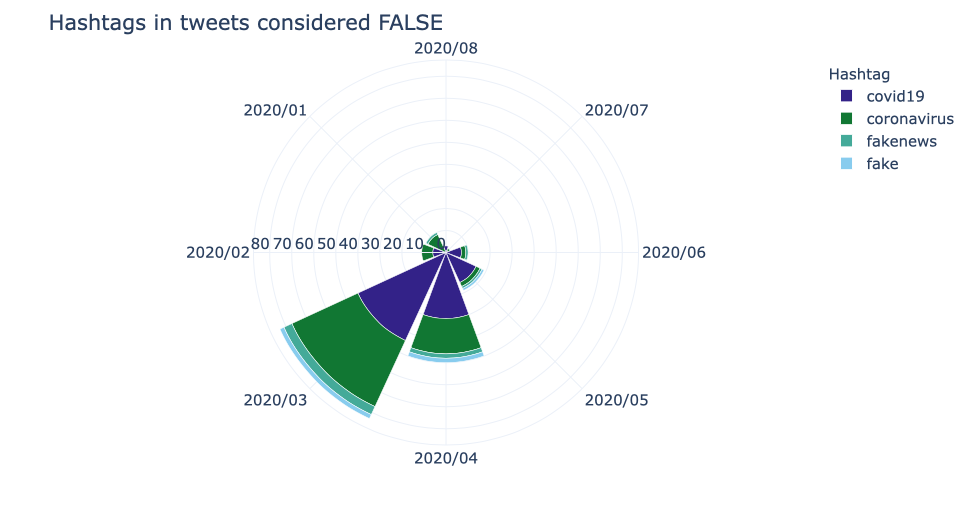

In [ ]:
fig2 = px.bar_polar(df, r="Count Partially False Tweets", theta="Date",
                   color="Hashtag",template='plotly_white',
                   color_discrete_sequence= ['#88CCEE','#DDCC77','#CC6677','#AA4499','#882255'])

fig2.update_layout(
    title='Hashtags in tweets considered PARTIALLY FALSE',
    font_size=15,
    legend_font_size=15,
    polar = dict(
      radialaxis = dict(
        angle = 180,
        tickangle = -180 # so that tick labels are not upside down
      )
    )
)

fig2.show()

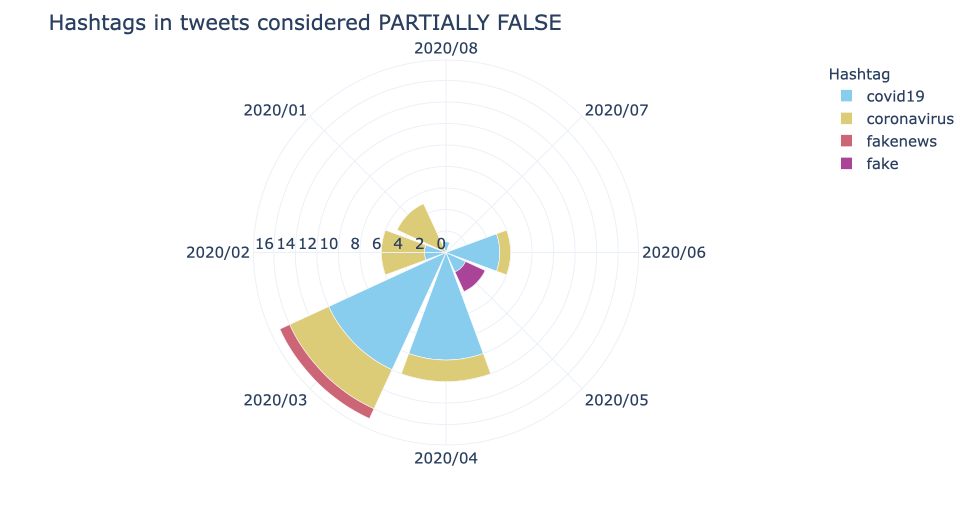

## Mentions

In order to get a cool and meaningful visualisation we picked the most frequent/more meaningful users mentioned in the tweets, but the chart can be exapanded with as many usernames as we want.

In [ ]:
index=0
mixmentions = []
mentions_list = ["DrTedros","WHO","realDonaldTrump"]
for element in data:
    token_id = data[index]['id_str']
    indice_csv = lista_unica_csv.index(token_id)
    for entity in data[index]['entities']['user_mentions']:
        token_mentions=entity['screen_name']
        if token_mentions in mentions_list:
            token=data[index]['created_at']
            d = parse(token)
            d = d.strftime('%Y/%m')
            final_token = token_mentions + " " +lista_unica_csv[indice_csv+1].lower().replace(" ", "") + " " + d
            mixmentions.append(final_token)
        
    index=index+1
    
    
fdist_mentions = dict(nltk.FreqDist(mixmentions))

dfm = pd.DataFrame.from_dict(fdist_mentions, orient='index').reset_index()
dfm = dfm.rename(columns={'index':'Mention', 0:'Count'})


col_one_list = dfm['Mention'].tolist()
col_two_list = dfm['Count'].tolist()
typelist=[]
namelist=[]
datelist=[]

index = 0

count_false = [0] * len(col_one_list)
count_part = [0] * len(col_one_list)

for el in col_one_list:
    tok = el.split()
    namelist.append(tok[0])
    datelist.append(tok[2])
    indx = namelist.index(tok[0])
    if tok[1] == "false":
        count_false[index] = col_two_list[index]
    elif tok[1] == "partiallyfalse":
        count_part[index] = col_two_list[index]
    else:
        print("errore count")
    index = index + 1


dfm['Mentioned User']=namelist
dfm['Count False Tweets']=count_false
dfm['Count Partially False Tweets']=count_part
del dfm['Count']
dfm['Count'] = dfm['Count False Tweets'] + dfm['Count Partially False Tweets']
dfm['Date']=datelist


dfm = dfm.sort_values(by=['Date'],ascending=[False])


figmm = px.bar_polar(dfm, r="Count False Tweets", theta="Date",
                   color="Mentioned User",template='plotly_white',
                   color_discrete_sequence= ['#33BBEE', '#009988', '#EE7733', '#CC3311','#EE3377'])

figmm.update_layout(
    title='Usernames mentioned in FALSE tweets',
    font_size=15,
    legend_font_size=15,
)

figmm.show()

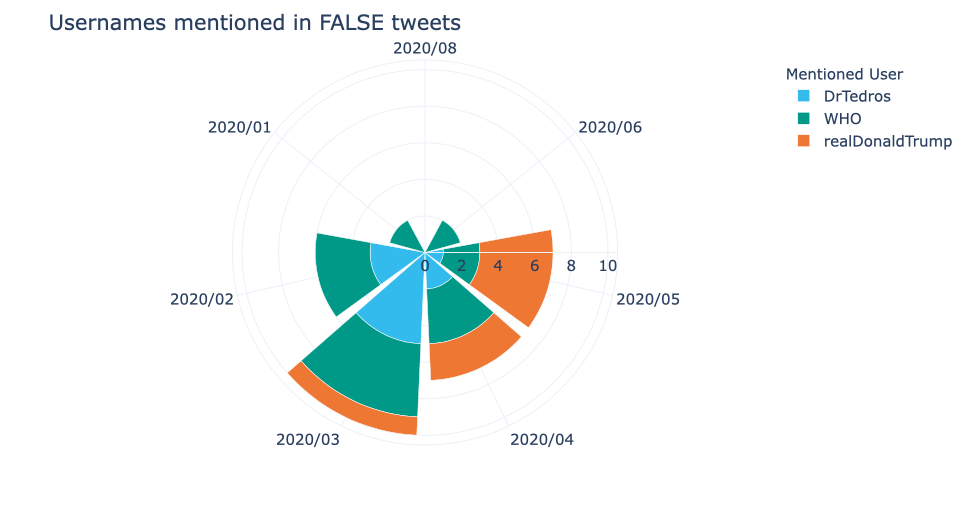

In [ ]:
figm = px.bar_polar(dfm, r="Count False Tweets", theta="Date",
                   color="Mentioned User",template='plotly_white',
                   color_discrete_sequence= ['#AA4499','#999933','#332288', '#88CCEE', '#44AA99'])

figm.update_layout(
    title='Usernames mentioned in PARTIALLY FALSE tweets',
    font_size=15,
    legend_font_size=15,
    polar = dict(
      radialaxis = dict(
        angle = 90,
        tickangle = 90 # so that tick labels are not upside down
      )
    )
)

figm.show()

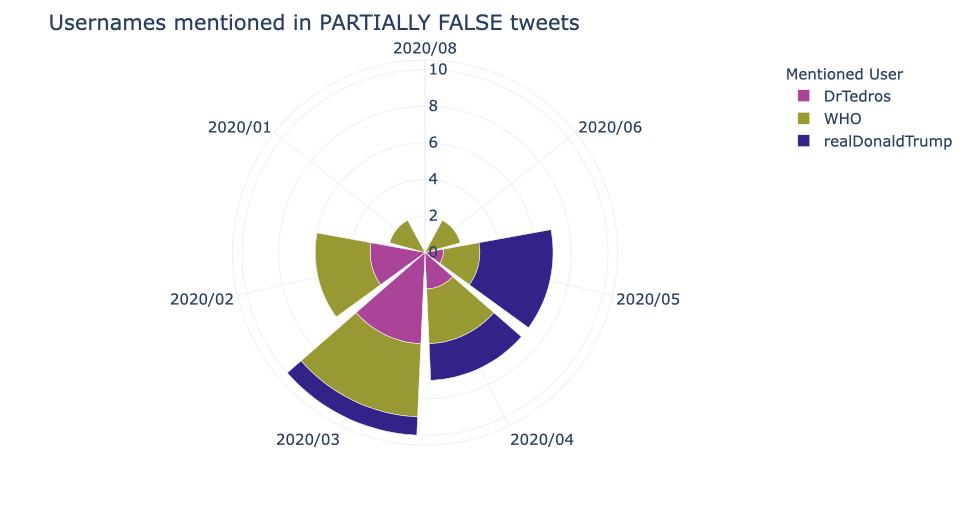

## Emoji

In order to get a cool and meaningful visualisation we picked the most frequent/more meaningful emojis in the tweets, but the chart can be exapanded with as many emojis as we want.

In [ ]:
index= 0
emosmix = []
emoji_list = ["⚠️","🚨","🔴","🤔"]#,"👇"
for element in data:
    token_id = data[index]['id_str']
    indice_csv = lista_unica_csv.index(token_id)
    em = demoji.findall_list(data[index]['full_text'], False)
    for e in em:
        if e in emoji_list:
            token=data[index]['created_at']
            d = parse(token)
            d = d.strftime('%Y/%m')
            final_token = e + " " +lista_unica_csv[indice_csv+1].lower().replace(" ", "") + " " + d
            emosmix.append(final_token)
    index= index+1
    
cemo = Counter(emosmix)

dfe = pd.DataFrame.from_dict(cemo, orient='index').reset_index()
dfe = dfe.rename(columns={'index':'Emoji', 0:'Count'})
col_one_list = dfe['Emoji'].tolist()
col_two_list = dfe['Count'].tolist()

typelist=[]
namelist=[]
datelist=[]

index = 0

count_false = [0] * len(col_one_list)
count_part = [0] * len(col_one_list)

for el in col_one_list:
    tok = el.split()
    namelist.append(tok[0])
    datelist.append(tok[2])
    indx = namelist.index(tok[0])
    if tok[1] == "false":
        count_false[index] = col_two_list[index]
    elif tok[1] == "partiallyfalse":
        count_part[index] = col_two_list[index]
    else:
        print("errore count")
   
    index = index + 1


dfe['Emoji']=namelist
dfe['Count False Tweets']=count_false
dfe['Count Partially False Tweets']=count_part
del dfe['Count']
dfe['Count'] = dfe['Count False Tweets'] + dfe['Count Partially False Tweets']
dfe['Date']=datelist

dfe = dfe.sort_values(by=['Count'],ascending=[False])

figem = px.bar_polar(dfe, r="Count False Tweets", theta="Date",
                   color="Emoji",template='plotly_white',
                   color_discrete_sequence= ['#56B4E9','#F0E442','#CC79A7','#009E73','#D55E00'])

figem.update_layout(
    title='Emoji used in FALSE tweets',
    font_size=15,
    legend_font_size=15,
    polar = dict(
      radialaxis = dict(
        angle = 180,
        tickangle = -180 # so that tick labels are not upside down
      )
    )
)

figem.show()

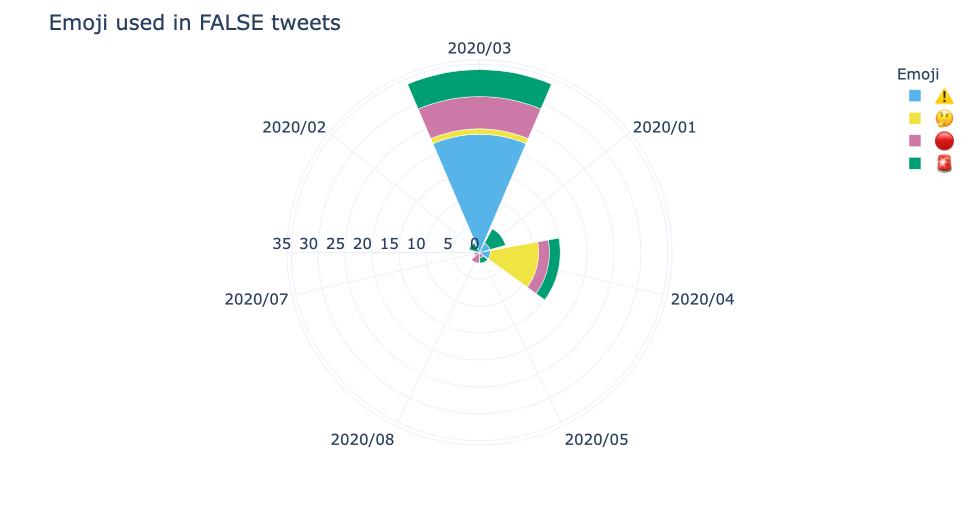

In [ ]:
figem = px.bar_polar(dfe, r="Count Partially False Tweets", theta="Date",
                   color="Emoji",template='plotly_white',
                   color_discrete_sequence= ['#E69F00','#DDCC77','#44AA99','#1AFF1A','#4B0092'])

figem.update_layout(
    title='Emoji used in PARTIALLY FALSE tweets',
    font_size=15,
    legend_font_size=15,
)

figem.show()

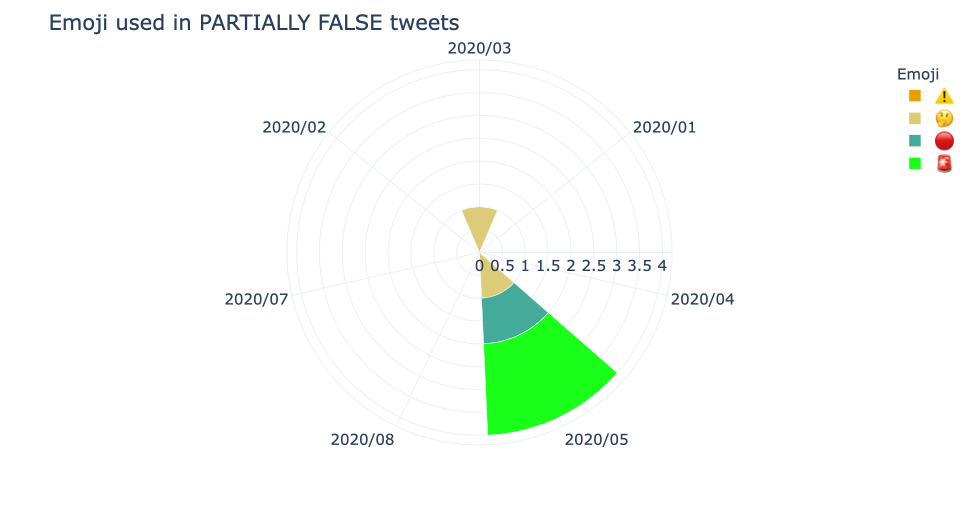

## Text

In order to get a cool and meaningful visualisation we picked the most frequent/more meaningful words in the tweets, but the chart can be exapanded with as many words as we want. Below you'll find the code:

In [ ]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_urls(text):
    result = re.sub(r"http\S+", "", text)
    return(result)

def remove_twitter_urls(text):
    clean = re.sub(r"pic.twitter\S+", "",text)
    return(clean)

def give_emoji_free_text(text):
    return emoji.get_emoji_regexp().sub(r'', text)

def noamp(text):
    clean = re.sub("&amp", " ",text)
    return (clean)

In [ ]:
index=0
comment_words = []
wordlist = ["coronavirus","covid19","people","cases"]
for element in data1:
    token_id = data1[index]['id_str']
    indice_csv = lista_unica_csv.index(token_id)
    
    data1[index]['full_text'] = data1[index]['full_text'].lower()                 # Put everything in lowercase
    #data[index]['full_text'] = contractions.fix(data[index]['full_text'])
    data1[index]['full_text'] = re.sub("\'\w+", '', data1[index]['full_text'])    # Remove everything after '
    data1[index]['full_text'] = remove_urls(data1[index]['full_text'])
    data1[index]['full_text'] = remove_twitter_urls(data1[index]['full_text'])
    data1[index]['full_text'] = remove_emoticons(data1[index]['full_text'])
    data1[index]['full_text'] = remove_emoji(data1[index]['full_text'])
    data1[index]['full_text'] = give_emoji_free_text(data1[index]['full_text'])
    data1[index]['full_text'] = noamp(data1[index]['full_text'])                  # No amp with space
    data[index]['full_text'] = re.sub("#\S+", " ",  data1[index]['full_text'])   # Remove hashtags
    data1[index]['full_text'] = re.sub("@\S+", " ",  data1[index]['full_text'])   # No mentions
    data1[index]['full_text'] = data1[index]['full_text'].translate(str.maketrans('', '', string.punctuation)) # No puntuaction
    data1[index]['full_text'] = data1[index]['full_text'].encode('ascii', 'ignore').decode() # No unicode
    data1[index]['full_text'] = re.sub("^rt ", " ", data1[index]['full_text'])    # No RT
    data1[index]['full_text'] = re.sub('\s{2,}', " ", data1[index]['full_text'])  # Remove big spaces

    tokens=data1[index]['full_text'].split()

    for t in tokens:
        if t in wordlist:
            token=data[index]['created_at']
            d = parse(token)
            d = d.strftime('%Y/%m')
            final_token = t + " " +lista_unica_csv[indice_csv+1].lower().replace(" ", "") + " " + d
            comment_words.append(final_token)
            
    index=index+1
    
    
fdist = dict(nltk.FreqDist(comment_words))


dfw = pd.DataFrame.from_dict(fdist, orient='index').reset_index()
dfw = dfw.rename(columns={'index':'Words', 0:'Count'})
col_one_list = dfw['Words'].tolist()
col_two_list = dfw['Count'].tolist()
typelist=[]
namelist=[]
datelist = []

index = 0

count_false = [0] * len(col_one_list)
count_part = [0] * len(col_one_list)

for el in col_one_list:
    tok = el.split()
    namelist.append(tok[0])
    indx = namelist.index(tok[0])
    datelist.append(tok[2])
    if tok[1] == "false":
        count_false[index] = col_two_list[index]
    elif tok[1] == "partiallyfalse":
        count_part[index] = col_two_list[index]
    else:
        print("errore count")
    index = index + 1


dfw['Words']=namelist
dfw['Count False Tweets']=count_false
dfw['Count Partially False Tweets']=count_part
del dfw['Count']
dfw['Count'] = dfw['Count False Tweets'] + dfw['Count Partially False Tweets']
dfw['Date']=datelist

dfw = dfw.sort_values(by=['Count'],ascending=[False])

figw = px.bar_polar(dfw, r="Count False Tweets", theta="Date",
                   color="Words",template='plotly_white',
                   color_discrete_sequence= ['#648FFF','#DC267F','#FFB000','#785EF0','#FE6100'])

figw.update_layout(
    title='Words used in FALSE tweets',
    font_size=15,
    legend_font_size=15,
)

figw.show()

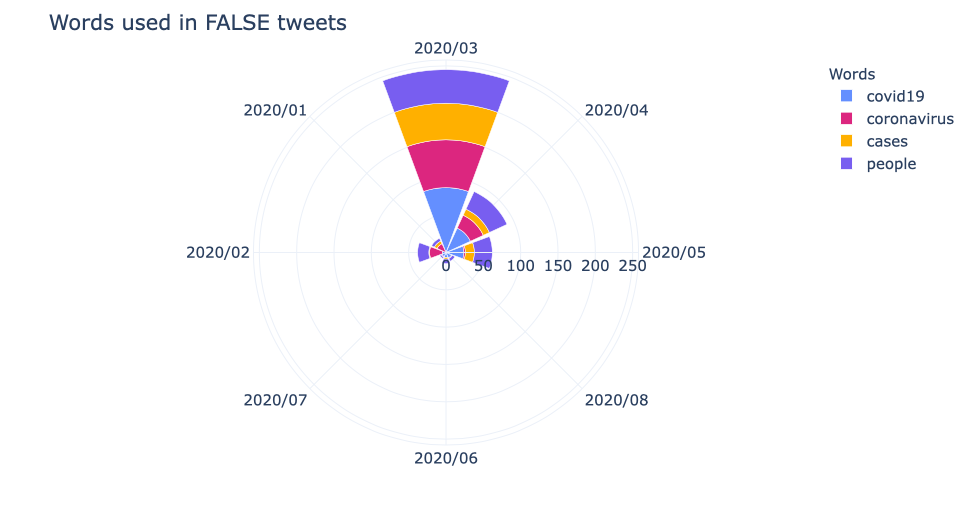

In [ ]:
figww = px.bar_polar(dfw, r="Count Partially False Tweets", theta="Date",
                   color="Words",template='plotly_white',
                  color_discrete_sequence= ['#882255','#88CCEE','#AA4499','#DDCC77','#CC6677'])

figww.update_layout(
    title='Words used in PARTIALLY FALSE tweets',
    font_size=15,
    legend_font_size=15,
     polar = dict(
      radialaxis = dict(
        angle = 270,
        tickangle = 270 # so that tick labels are not upside down
      )
    )
)

figww.show()

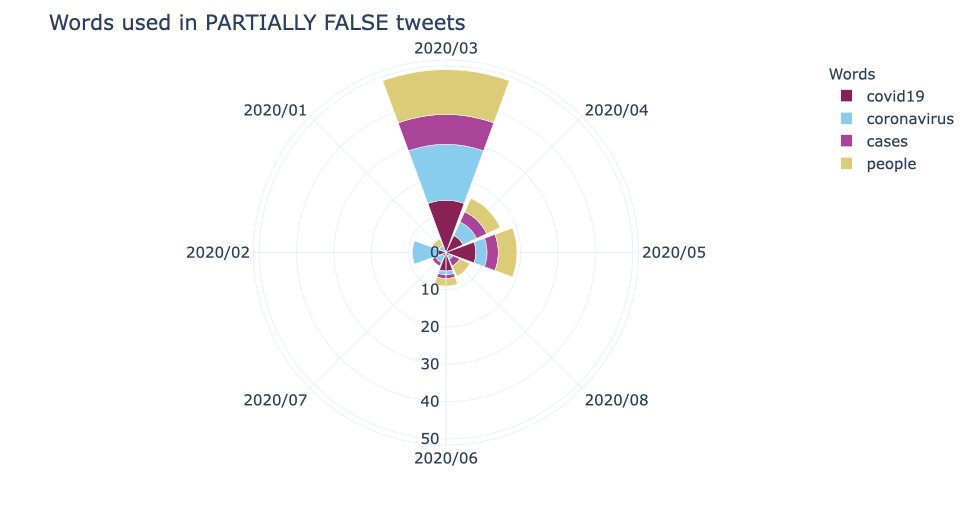

## Bigrams

In order to get a cool and meaningful visualisation we picked the most frequent/more meaningful bigrams in the tweets, but the chart can be exapanded with as many bigrams as we want.

In [ ]:
index=0
stop_words = stopwords.words('english')
bigramlist = ["corona virus","fake news","confirmed cases","tested positive"]
new_bigram=[]
for element in data2:
    token_id = data2[index]['id_str']
    indice_csv = lista_unica_csv.index(token_id)
    
    data2[index]['full_text'] = data2[index]['full_text'].lower()                      # Put everything in lowercase
    data2[index]['full_text'] = contractions.fix(data2[index]['full_text'])
    #data[index]['full_text'] = re.sub("\'\w+", '', data[index]['full_text'])        # Remove everything after '
    data2[index]['full_text'] = remove_urls(data2[index]['full_text'])
    data2[index]['full_text'] = remove_twitter_urls(data2[index]['full_text'])
    data2[index]['full_text'] = remove_emoticons(data2[index]['full_text'])
    data2[index]['full_text'] = remove_emoji(data2[index]['full_text'])
    data2[index]['full_text'] = give_emoji_free_text(data2[index]['full_text'])
    data2[index]['full_text'] = noamp(data2[index]['full_text'])                        # No amp with space
    data2[index]['full_text'] = re.sub("#\S+", " ",  data2[index]['full_text'])         # Remove hashtags
    data2[index]['full_text'] = re.sub("@\S+", " ",  data2[index]['full_text'])         # No mentions
    data2[index]['full_text'] = data2[index]['full_text'].translate(str.maketrans('', '', string.punctuation)) # No puntuaction
    data2[index]['full_text'] = data2[index]['full_text'].encode('ascii', 'ignore').decode() # No unicode
    data2[index]['full_text'] = re.sub("^rt ", " ", data2[index]['full_text'])          # No RT
    data2[index]['full_text'] = re.sub('\s{2,}', " ", data2[index]['full_text'])        # Remove big spaces
    bigram_tokens=list(nltk.bigrams(nltk.word_tokenize(data2[index]['full_text'])))
    #print(bigram_tokens)
    clean_bigram_tokens = [gram for gram in bigram_tokens if not any(stop in gram for stop in stop_words)]
    for c in clean_bigram_tokens:
        a = ' '.join(c)
        if a in bigramlist:
            token=data[index]['created_at']
            d = parse(token)
            d = d.strftime('%Y/%m')
            final_token = a + " " +lista_unica_csv[indice_csv+1].lower().replace(" ", "") + " " + d
            new_bigram.append(final_token)
   
    index=index+1

    
fdist_bi = dict(nltk.FreqDist(new_bigram))
dfb = pd.DataFrame.from_dict(fdist_bi, orient='index').reset_index()
dfb = dfb.rename(columns={'index':'Bigrams', 0:'Count'})
col_one_list = dfb['Bigrams'].tolist()
col_two_list = dfb['Count'].tolist()
typelist=[]
namelist=[]
datelist = []

index = 0

count_false = [0] * len(col_one_list)
count_part = [0] * len(col_one_list)

for el in col_one_list:
    tok = el.split()
    namelist.append(tok[0] + " " + tok[1])
    indx = namelist.index(tok[0] + " " + tok[1])
    datelist.append(tok[3])
    if tok[2] == "false":
        count_false[index] = col_two_list[index]
    elif tok[2] == "partiallyfalse":
        count_part[index] = col_two_list[index]
    else:
        print("errore count")
    index = index + 1

dfb['Bigrams']=namelist
dfb['Count False Tweets']=count_false
dfb['Count Partially False Tweets']=count_part
del dfb['Count']
dfb['Count'] = dfb['Count False Tweets'] + dfb['Count Partially False Tweets']
dfb['Date']=datelist

dfb = dfb.sort_values(by=['Count'],ascending=[False])

figb = px.bar_polar(dfb, r="Count False Tweets", theta="Date",
                   color="Bigrams",template='plotly_white',
                   color_discrete_sequence= ['#994F00','#E1BE6A','#D35FB7','#E66100','#FEFE62'])

figb.update_layout(
    title='Bigrams used in FALSE tweets',
    font_size=15,
    legend_font_size=15,
     polar = dict(
      radialaxis = dict(
        angle = 180,
        tickangle = -180 # so that tick labels are not upside down
      )
    )
)

figb.show()

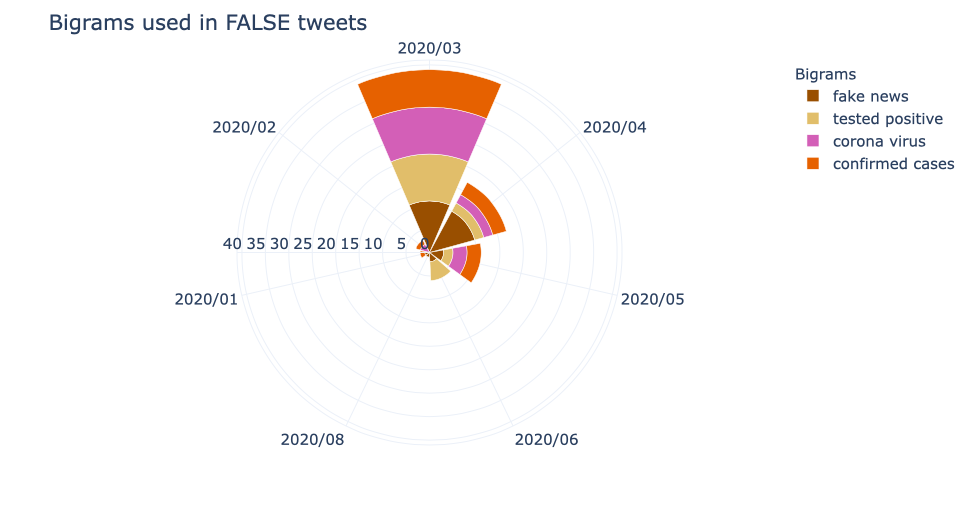

In [ ]:
#PARTIALLY FALSE
figbb = px.bar_polar(dfb, r="Count Partially False Tweets", theta="Date",
                   color="Bigrams",template='plotly_white',
                   color_discrete_sequence= ['#FFC20A','#D41159','#1A85FF','#1AFF1A','#40B0A6'])

figbb.update_layout(
    title='Bigrams used in PARTIALLY FALSE tweets',
    font_size=15,
    legend_font_size=15,
    polar = dict(
      radialaxis = dict(
        angle = 180,
        tickangle = -180 # so that tick labels are not upside down
      )
    )
)

figbb.show()

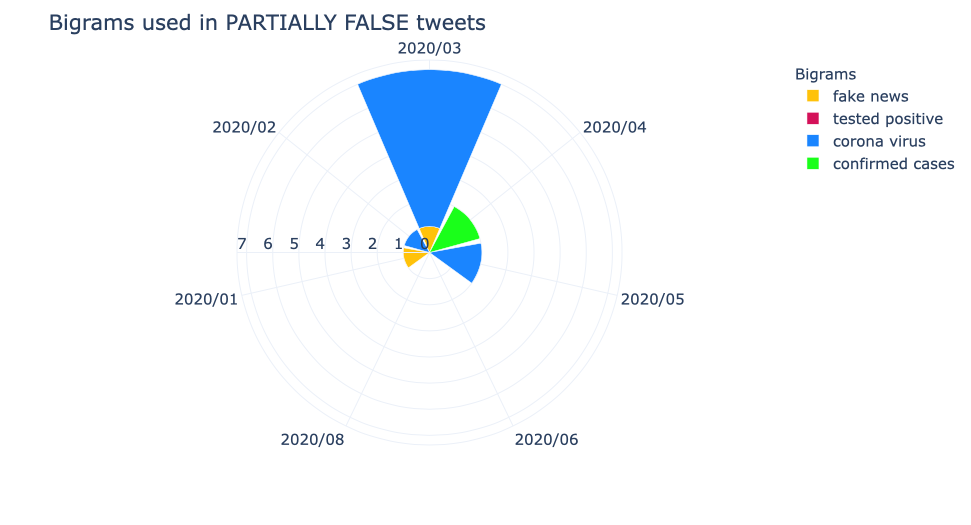

## Trigrams

In order to get a cool and meaningful visualisation we picked the most frequent/more meaningful trigrams in the tweets, but the chart can be exapanded with as many trigrams as we want.

In [ ]:
index_tri=0
stop_words_tri = stopwords.words('english')
new_trigram=[]
trigramlist = ["fake news alert","world health organisation","new coronavirus 2019ncov","let us go"]
for element in data3:
    token_id = data3[index_tri]['id_str']
    indice_csv = lista_unica_csv.index(token_id)
    
    data3[index_tri]['full_text'] = data3[index_tri]['full_text'].lower()                # Put everything in lowercase
    data3[index_tri]['full_text'] = contractions.fix(data3[index_tri]['full_text'])
    #data[index_tri]['full_text'] = re.sub("\'\w+", '', data[index_tri]['full_text'])  # Remove everything after '
    data3[index_tri]['full_text'] = remove_urls(data3[index_tri]['full_text'])
    data3[index_tri]['full_text'] = remove_twitter_urls(data3[index_tri]['full_text'])
    data3[index_tri]['full_text'] = remove_emoticons(data3[index_tri]['full_text'])
    data3[index_tri]['full_text'] = remove_emoji(data3[index_tri]['full_text'])
    data3[index_tri]['full_text'] = give_emoji_free_text(data3[index_tri]['full_text'])
    data3[index_tri]['full_text'] = noamp(data3[index_tri]['full_text'])                 # No amp with space
    data3[index_tri]['full_text'] = re.sub("#\S+", " ",  data3[index_tri]['full_text'])  # Remove hashtags
    data3[index_tri]['full_text'] = re.sub("@\S+", " ",  data3[index_tri]['full_text'])  # No mentions
    data3[index_tri]['full_text'] = data3[index_tri]['full_text'].translate(str.maketrans('', '', string.punctuation)) # No puntuaction
    data3[index_tri]['full_text'] = data3[index_tri]['full_text'].encode('ascii', 'ignore').decode() # No unicode
    data3[index_tri]['full_text'] = re.sub("^rt ", " ", data3[index_tri]['full_text'])   # No RT
    data3[index_tri]['full_text'] = re.sub(r'\b\d\b', lambda x: num2words.num2words(int(x.group(0))), data3[index_tri]['full_text'])
    data3[index_tri]['full_text'] = re.sub('\s{2,}', " ", data3[index_tri]['full_text']) # Remove big spaces
    trigram_tokens=list(nltk.trigrams(nltk.word_tokenize(data3[index_tri]['full_text'])))
    #print(trigram_tokens)
    clean_trigram_tokens = [gram for gram in trigram_tokens if not any(stop in gram for stop in stop_words_tri)]
    for c in clean_trigram_tokens:
        a = ' '.join(c)
        if a in trigramlist:
            token=data[index_tri]['created_at']
            d = parse(token)
            d = d.strftime('%Y/%m')
            final_token = a + " " +lista_unica_csv[indice_csv+1].lower().replace(" ", "") + " " + d
            new_trigram.append(final_token)
    
    index_tri=index_tri+1
    
fdist_tri = dict(nltk.FreqDist(new_trigram))
dft = pd.DataFrame.from_dict(fdist_tri, orient='index').reset_index()
dft = dft.rename(columns={'index':'Trigrams', 0:'Count'})
col_one_list = dft['Trigrams'].tolist()
col_two_list = dft['Count'].tolist()
typelist=[]
namelist=[]
datelist = []

index = 0

count_false = [0] * len(col_one_list)
count_part = [0] * len(col_one_list)

for el in col_one_list:
    tok = el.split()
    namelist.append(tok[0] + " " + tok[1] + " " + tok[2])
    indx = namelist.index(tok[0] + " " + tok[1] + " " + tok[2])
    datelist.append(tok[4])
    if tok[3] == "false":
        count_false[index] = col_two_list[index]
    elif tok[3] == "partiallyfalse":
        count_part[index] = col_two_list[index]
    else:
        print("errore count")
    index = index + 1

i=0
for el in col_two_list:
    col_two_list[i] = count_false[i] + count_part[i]
    i = i + 1

dft['Trigrams']=namelist
dft['Count False Tweets']=count_false
dft['Count Partially False Tweets']=count_part
del dft['Count']
dft['Count'] = dft['Count False Tweets'] + dft['Count Partially False Tweets']
dft['Date']=datelist

dft = dft.sort_values(by=['Count'],ascending=[False])
figt = px.bar_polar(dft, r="Count False Tweets", theta="Date",
                   color="Trigrams",template='plotly_white',
                   color_discrete_sequence= ['#0077BB','#33BBEE','#332288','#999933','#DDCC77'])

figt.update_layout(
    title='Trigrams used in FALSE tweets',
    font_size=15,
    legend_font_size=15,
    polar = dict(
      radialaxis = dict(
        angle = 260,
        tickangle = 260 # so that tick labels are not upside down
      )
    )
    
)

figt.show()

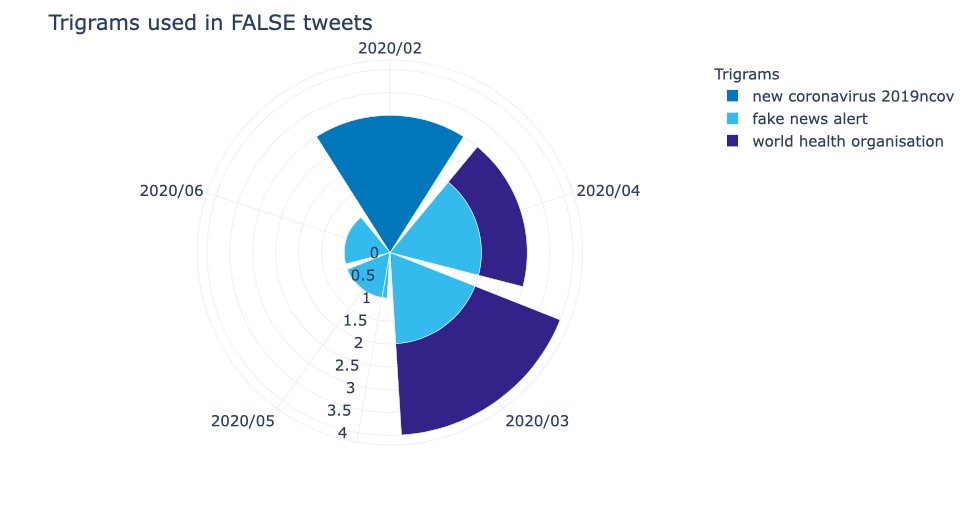

In [ ]:
figtt = px.bar_polar(dft, r="Count Partially False Tweets", theta="Date",
                   color="Trigrams",template='plotly_white',
                  color_discrete_sequence= ['#CC3311','#EE3377', '#BBBBBB','#E69F00','#F0E442'])

figtt.update_layout(
    title='Trigrams used in PARTIALLY FALSE tweets',
    font_size=15,
    legend_font_size=15,
    polar = dict(
      radialaxis = dict(
        angle = 180,
        tickangle = -180 # so that tick labels are not upside down
      )
    )
)

figtt.show()

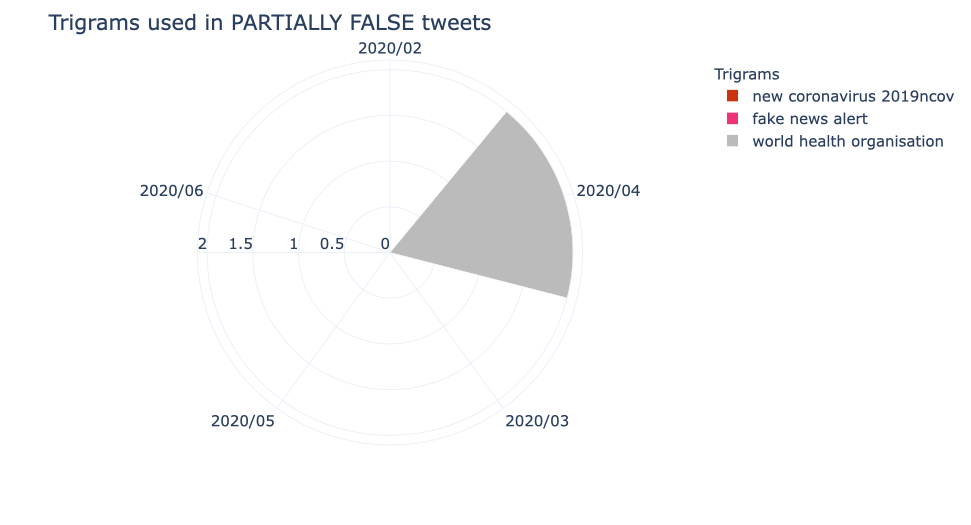